In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
## Import any libarary
import pandas as pd
import numpy as np
import random as random
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples

## Import animal data
df = pd.read_csv('/content/drive/My Drive/data/animals.csv')
array = np.array([
                       df["x"].tolist(),
                       df["y"].tolist()
                       ], np.int32)
array = array.T

**Elbow method**


The main idea of the Elbow method is to minimize the total variance of clusters.
1.   Compute clustering algorithm (e.g., k-means clustering) for different values of k.
2.   For each k, calculate the total within-cluster sum of square(wss).
3.   Plot the curve of wss according to the number of clusters k.
4.   The location of a bend (knee) in the plot is generally considered as an indicator of the appropriate number of clusters.


**Silhouette method**


The main idea is to find the largest Silhouette Coefficient.
1.   Compute clustering algorithm (e.g., k-means clustering) for different values of k.
1.   For each k, get the mean distance between (i) and all other data points in the same cluster. Define this as (a).
2.   Get the mean distance between (i) and all data points in any other cluster. Define the smallest distance as (b).
3.   The Silhouette Coefficient for (i) is (b - a) / max(a, b). Get the mean Silhouette Coefficient over all samples.
4.   Plot all samples' Silhouette Coefficient for different values of k.
5.   Select the one in which relatively most samples hit the higher Silhouette Coefficient.


**Gap statistic method**


The main idea of this method is to compare the gap between the total sum of squares of variation of original clusters and modified clusters which incorporate new expected values.
1.   Cluster the observed data, varying the number of clusters from k = 1, …, kmax, and compute the corresponding total sum of squares of variation (Wk).
2.   Generate B reference data sets over the range of the observed values. Cluster each of these reference with varying number of clusters k = 1, …, kmax, and compute the corresponding total sum of squares of variation (Wkb).
3.   Compute the estimated gap statistic: Gap(k)=(1/B)∑log(Wkb)−log(Wk)
4.   Choose the number of clusters as the smallest value such that Gap(k) >= Gap(k+1) - S(k+1).



**Reference**


*   [Determining The Optimal Number Of Clusters: 3 Must Know Methods](https://www.datanovia.com/en/lessons/determining-the-optimal-number-of-clusters-3-must-know-methods/)

*   [sklearn.metrics.silhouette_score](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html#sklearn-metrics-silhouette-score)(This function returns the mean Silhouette Coefficient over all samples.)

*   [Estimating the number of clusters in a data set via the gap statistic](http://web.stanford.edu/~hastie/Papers/gap.pdf)

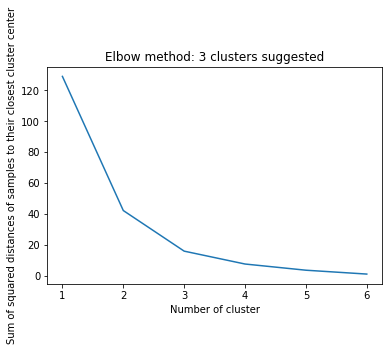

In [0]:
## Elbow method
## Plot inertia for each cluster.
list_inertia = {}  # Inertia is the sum of squared distances of samples to their closest cluster center.
for i in range(1, len(df.index)):
  pred = KMeans(n_clusters=i, random_state=20).fit(array)
  list_inertia[i] = pred.inertia_

plt.figure()
plt.plot(list(list_inertia.keys()), list(list_inertia.values()))
plt.xlabel("Number of clusters")
plt.ylabel("Sum of squared distances of samples to their closest cluster center")
plt.title('Elbow method: 3 clusters suggested')
plt.show()

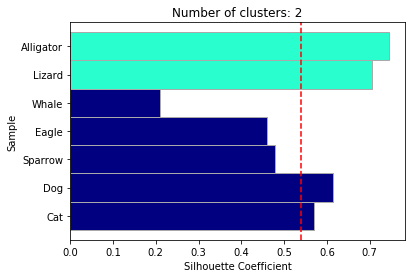

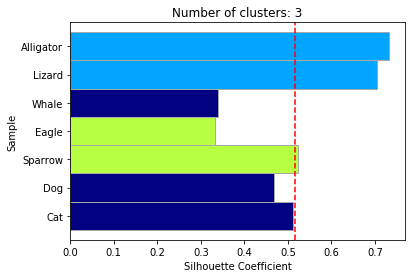

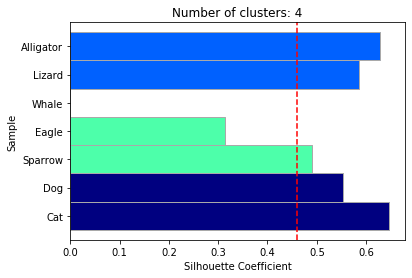

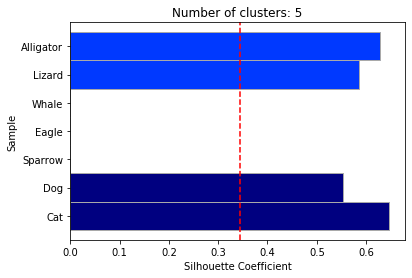

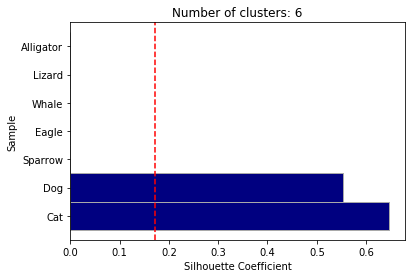

In [0]:
## Silhouette method
for i in range(2, len(df.index)):
  kmeans = KMeans(n_clusters=i, random_state=20).fit(array)
  silhouette_coefficients = silhouette_samples(array, kmeans.labels_, metric='euclidean')
  f = plt.figure(i)
  for index, sc in enumerate(silhouette_coefficients):
    plt.barh(range(index+1, index+2),
                         sc,
                         height=1.0,
                         edgecolor='darkgrey',
                         color=cm.jet(float(kmeans.labels_[index])/(i+0.5)))
  plt.ylabel('Sample')
  plt.xlabel('Silhouette Coefficient')
  plt.title("Number of clusters: %d" % (i))
  silhouette_avg = np.mean(silhouette_coefficients)
  plt.axvline(silhouette_avg,color="red",linestyle="--")
  plt.yticks(np.arange(1,8),df['Name'])
  f.show()

3
4


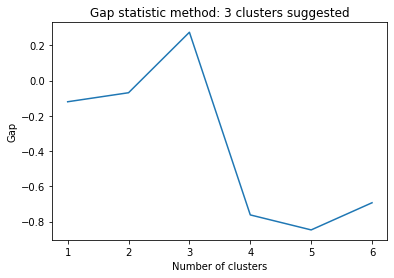

In [0]:
## Gap statistic method
## inertia_: Sum of squared distances of samples to their closest cluster center.
B = 100 # B = 500 gives quite precise results
list_gap = {}
list_sk = {}
for i in range(1, len(df.index)):
  list_wkb = []
  list_wkb_log = []
  list_squared_deviation = []
  for n in range(0, B):
    ## Generate reference data set.
    ## (a) generate each reference feature uniformly over the range of the observed values for that feature;
    random.seed(20)
    array_b = []
    for m in range(0, len(df.index)):
      x = random.randint(2, 12) # Range of x is from 2 to 12.
      y = random.randint(2, 8) # Range of y is from 2 to 8.
      array_b.append([int(x),int(y)])
    b_kmeans = KMeans(n_clusters=i, random_state=20).fit(array_b)
    wkb = b_kmeans.inertia_
    list_wkb.append(wkb)
  for wkb in list_wkb:
    list_wkb_log.append(np.log(wkb))
  l_mean = np.mean(list_wkb_log) # (1/B)∑log(Wkb)
  for wkb_log in list_wkb_log:
    list_squared_deviation.append((wkb_log - l_mean)**2)
  sdk = (np.mean(list_squared_deviation))**(1/2)
  sk = sdk * ((1+1/B)**(1/2))
  list_sk[i] = sk
  original_kmeans = KMeans(n_clusters=i, random_state=20).fit(array)
  wk = original_kmeans.inertia_
  list_gap[i] = l_mean - np.log(wk)

## k = smallest k such that Gap(k) ≥ Gap(k+1) - S(k+1)
i = 1
while i < len(list_gap):
  if (list_gap[i] >= list_gap[i+1] - list_sk[i+1]):
    print(i)
  i += 1

plt.figure()
plt.plot(list(list_gap.keys()), list(list_gap.values()))
plt.xlabel("Number of clusters")
plt.ylabel("Gap")
plt.title('Gap statistic method: 3 clusters suggested')
plt.show()



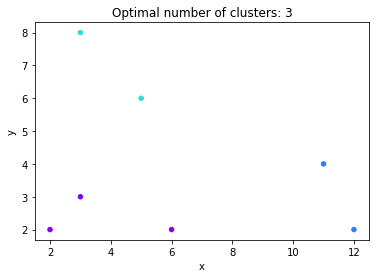

In [0]:
## Optimal number of clusters
optimal_number_of_clusters = 3
df_optimal = pd.read_csv('/content/drive/My Drive/homework/part2/animals.csv')
array_optimal = np.array([
                       df_optimal["x"].tolist(),
                       df_optimal["y"].tolist()
                       ], np.int32).T
pred = KMeans(n_clusters=optimal_number_of_clusters, random_state=2020).fit_predict(array_optimal)
df_optimal['cluster_id'] = pred
colors = cm.rainbow(np.linspace(0, 1, len(df_optimal.index)))
cs = [colors[i] for i in df_optimal['cluster_id']]
df_optimal.plot.scatter(x='x', y='y', c=cs, title='Optimal number of clusters: {num}'.format(num=optimal_number_of_clusters))